In [1]:
import yfinance as yf
import pandas as pd

### investments tickers

In [25]:
symbol_type = "ETF"

In [26]:
yf_market_info  = pd.read_csv('../data/market_info.csv')

In [27]:
ticker_info_df = yf_market_info[yf_market_info.symbol_type==symbol_type].reset_index()
ticker_list = list(ticker_info_df.symbol)

In [28]:
ticker_symbols  = " ".join(ticker_list)

In [29]:
#ticker_symbols = ticker_symbols + " EURGBP=X"

In [55]:
data = yf.download(ticker_symbols, period='10y')
data.head()

[*********************100%***********************]  4 of 4 completed


Price        Close                                        High             \
Ticker      CNKY.L     FTAL.L  S600.L     SXR8.DE       CNKY.L     FTAL.L   
Date                                                                        
2015-01-15  8519.0  37.840000  4968.0  158.070007  8519.000000  38.299999   
2015-01-16  8547.0  38.299999  5009.0  158.949997  8470.150391  38.299999   
2015-01-19  8566.0  38.470001  5049.0  158.570007  8535.000000  38.599998   
2015-01-20  8599.5  38.759998  5058.0  159.100006  8761.000000  38.980000   
2015-01-21  8643.5  39.209999  5121.0  160.610001  8634.000000  39.230000   

Price                                   Low                                 \
Ticker      S600.L     SXR8.DE       CNKY.L     FTAL.L  S600.L     SXR8.DE   
Date                                                                         
2015-01-15  4968.0  158.960007  8519.000000  36.810001  4968.0  155.880005   
2015-01-16  5009.0  159.619995  8470.150391  37.450001  5009.0  155.860001   
2015-01-19  5049.0  159.509995  8527.849609  38.139999  5049.0  158.089996   
2015-01-20  5058.0  160.410004  8533.849609  38.529999  5058.0  158.570007   
2015-01-21  5102.0  160.759995  8617.349609  38.549999  5102.0  158.250000   

Price              Open                                Volume           \
Ticker           CNKY.L     FTAL.L  S600.L     SXR8.DE CNKY.L   FTAL.L   
Date                                                                     
2015-01-15  8519.000000  37.830002  4968.0  157.509995    0.0  19550.0   
2015-01-16  8470.150391  37.849998  5009.0  156.539993   15.0  42806.0   
2015-01-19  8527.849609  38.209999  5049.0  159.509995   44.0  17703.0   
2015-01-20  8674.000000  38.820000  5058.0  160.000000  984.0  33607.0   
2015-01-21  8634.000000  38.919998  5102.0  160.229996  171.0  15368.0   

Price                        
Ticker      S600.L  SXR8.DE  
Date                         
2015-01-15     0.0  21731.0  
2015-01-16     0.0  52447.0  
2015-01-19     0.0  48381.0  
2015-01-20     0.0  33048.0  
2015-01-21  2000.0  17544.0

In [56]:
data.columns

MultiIndex([( 'Close',  'CNKY.L'),
            ( 'Close',  'FTAL.L'),
            ( 'Close',  'S600.L'),
            ( 'Close', 'SXR8.DE'),
            (  'High',  'CNKY.L'),
            (  'High',  'FTAL.L'),
            (  'High',  'S600.L'),
            (  'High', 'SXR8.DE'),
            (   'Low',  'CNKY.L'),
            (   'Low',  'FTAL.L'),
            (   'Low',  'S600.L'),
            (   'Low', 'SXR8.DE'),
            (  'Open',  'CNKY.L'),
            (  'Open',  'FTAL.L'),
            (  'Open',  'S600.L'),
            (  'Open', 'SXR8.DE'),
            ('Volume',  'CNKY.L'),
            ('Volume',  'FTAL.L'),
            ('Volume',  'S600.L'),
            ('Volume', 'SXR8.DE')],
           names=['Price', 'Ticker'])

### returns

In [57]:
yf_period = "1y" # ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
yf_interval = "1d"

In [58]:
#  1.  Create dataframe yf_price with yf.download
yf_returns = yf.download(
        tickers = ticker_symbols,       # tickers list or string as well
        period = yf_period,      # optional, default is '1mo'
        interval = yf_interval,  # fetch data by intervaal
        group_by = 'ticker',     # group by ticker
        auto_adjust = True,      # adjust all OHLC (open-high-low-close)
        prepost = True,          # download market hours data
        threads = True,          # threads for mass downloading
        proxy = None)            # proxy

#  2.  Select 'Close' (price at market close) column only
yf_returns = yf_returns.iloc[:, yf_returns.columns.get_level_values(1)=='Close']

#  3.  Remove the dataframe multi-index
yf_returns.columns = yf_returns.columns.droplevel(1)  # multi-index

yf_returns_df = round(yf_returns.pct_change()*100, 4)

yf_returns_df.tail(10)

[*********************100%***********************]  4 of 4 completed


Ticker,CNKY.L,FTAL.L,SXR8.DE,S600.L
Date,,,,
2025-01-02,1.2418,1.0095,1.6612,0.7322
2025-01-03,-0.3729,-0.6373,-0.0557,-0.5137
2025-01-06,-0.1871,0.2114,0.5341,1.1398
2025-01-07,0.3059,-0.2109,-0.9973,0.2601
2025-01-08,0.8042,-0.2332,0.1350,0.1825
2025-01-09,-0.4758,0.8328,0.0822,0.8247
2025-01-10,-1.0296,-0.9347,-0.9789,-0.6372
2025-01-13,-0.1932,-0.2999,-0.0531,-0.5169
2025-01-14,-0.1439,-0.2641,-0.2190,0.4137


### dividends - check all ETFs are acc

In [59]:
ticker_list

['SXR8.DE', 'FTAL.L', 'CNKY.L', 'S600.L']

In [60]:
yf_dividend = pd.DataFrame()   # initialize dataframe

for i in ticker_list:
    x = pd.DataFrame(yf.Ticker(i).dividends)
    x = x.rename(columns={"Dividends":i})
    yf_dividend = pd.concat([yf_dividend,x], axis=1)
    if len(x) > 0:
        print('{:>8}\t- dividends'.format(i))
    else:
        print('{:>8}\t- no dividends'.format(i))             

#  match dates in yf_returns (first return data to now)
yf_dividend = yf_dividend[yf_dividend.index >= yf_returns.index[0]]

#  print out dividends
print("\n",yf_dividend.tail(10))

 SXR8.DE	- no dividends
  FTAL.L	- no dividends
  CNKY.L	- no dividends
  S600.L	- no dividends


TypeError: Invalid comparison between dtype=datetime64[ns, UTC] and Timestamp

### check currencies

In [ ]:
tickers = yf.Tickers(ticker_symbols)

In [61]:
tickers.tickers['SXR8.DE'].info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 601.28,
 'open': 601.26,
 'dayLow': 601.18,
 'dayHigh': 612.26,
 'regularMarketPreviousClose': 601.28,
 'regularMarketOpen': 601.26,
 'regularMarketDayLow': 601.18,
 'regularMarketDayHigh': 612.26,
 'volume': 45365,
 'regularMarketVolume': 45365,
 'averageVolume': 74107,
 'averageVolume10days': 51701,
 'averageDailyVolume10Day': 51701,
 'ask': 611.94,
 'bidSize': 3200,
 'askSize': 4700,
 'fiftyTwoWeekLow': 456.78,
 'fiftyTwoWeekHigh': 615.6,
 'fiftyDayAverage': 604.1156,
 'twoHundredDayAverage': 549.3077,
 'currency': 'EUR',
 'fundFamily': 'BlackRock Asset Management Ireland - ETF',
 'fundInceptionDate': 1576022400,
 'legalType': 'Exchange Traded Fund',
 'exchange': 'GER',
 'quoteType': 'ETF',
 'symbol': 'SXR8.DE',
 'underlyingSymbol': 'SXR8.DE',
 'shortName': 'iShs VII-Core S&P 500 U.ETF   R',
 'longName': 'iShares Core S&P 500 UCITS ETF USD (Acc)',
 'firstTradeDateEpochUtc': 1274252400,
 'timeZoneFullName': 'Europe/Berlin',
 'timeZ

In [62]:
tickers.tickers['FTAL.L'].info

{'phone': '+353 1 776 3000',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 67.98,
 'open': 67.84,
 'dayLow': 67.84,
 'dayHigh': 68.95,
 'regularMarketPreviousClose': 67.98,
 'regularMarketOpen': 67.84,
 'regularMarketDayLow': 67.84,
 'regularMarketDayHigh': 68.95,
 'trailingPE': 0.16081622,
 'volume': 2144,
 'regularMarketVolume': 2144,
 'averageVolume': 9056,
 'averageVolume10days': 14348,
 'averageDailyVolume10Day': 14348,
 'bid': 68.88,
 'ask': 68.98,
 'totalAssets': 485574816,
 'fiftyTwoWeekLow': 54.6595,
 'fiftyTwoWeekHigh': 70.6,
 'fiftyDayAverage': 68.4052,
 'twoHundredDayAverage': 67.902824,
 'navPrice': 67.87211,
 'currency': 'GBP',
 'ytdReturn': -0.0054133,
 'beta3Year': 0.98,
 'fundFamily': 'State Street Global Advisors Europe Limited',
 'fundInceptionDate': 1524700800,
 'legalType': 'Exchange Traded Fund',
 'threeYearAverageReturn': 0.0504992,
 'fiveYearAverageReturn': 0.042945698,
 'exchange': 'LSE',
 'quoteType': 'ETF',
 'symbol': 'FTAL.L',
 'underlyingSymbol': 'FT

In [63]:
tickers.tickers['CNKY.L'].info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 20118.0,
 'open': 20045.0,
 'dayLow': 20045.0,
 'dayHigh': 20305.0,
 'regularMarketPreviousClose': 20118.0,
 'regularMarketOpen': 20045.0,
 'regularMarketDayLow': 20045.0,
 'regularMarketDayHigh': 20305.0,
 'volume': 1983,
 'regularMarketVolume': 1983,
 'averageVolume': 1238,
 'averageVolume10days': 473,
 'averageDailyVolume10Day': 473,
 'bid': 20267.0,
 'ask': 20283.0,
 'bidSize': 14400,
 'askSize': 514400,
 'totalAssets': 52038213632,
 'fiftyTwoWeekLow': 16000.0,
 'fiftyTwoWeekHigh': 21362.0,
 'fiftyDayAverage': 20137.47,
 'twoHundredDayAverage': 19759.21,
 'navPrice': 39355.52,
 'currency': 'GBp',
 'fundFamily': 'BlackRock Asset Management Ireland - ETF',
 'fundInceptionDate': 1264377600,
 'legalType': 'Exchange Traded Fund',
 'exchange': 'LSE',
 'quoteType': 'ETF',
 'symbol': 'CNKY.L',
 'underlyingSymbol': 'CNKY.L',
 'shortName': 'ISHARES VII PLC ISHRS NIKKEI 22',
 'longName': 'iShares VII PLC - iShares Nikkei 225 ETF JPY Acc',
 

In [64]:
tickers.tickers['S600.L'].info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 10436.0,
 'open': 10460.212,
 'dayLow': 10460.212,
 'dayHigh': 10560.0,
 'regularMarketPreviousClose': 10436.0,
 'regularMarketOpen': 10460.212,
 'regularMarketDayLow': 10460.212,
 'regularMarketDayHigh': 10560.0,
 'volume': 902,
 'regularMarketVolume': 902,
 'averageVolume': 1932,
 'averageVolume10days': 1258,
 'averageDailyVolume10Day': 1258,
 'bid': 10554.0,
 'ask': 10558.0,
 'totalAssets': 462375008,
 'fiftyTwoWeekLow': 9504.864,
 'fiftyTwoWeekHigh': 10864.0,
 'fiftyDayAverage': 10308.94,
 'twoHundredDayAverage': 10478.415,
 'currency': 'GBp',
 'fundFamily': 'Invesco Investment Management Limited',
 'fundInceptionDate': 1238544000,
 'legalType': 'Exchange Traded Fund',
 'exchange': 'LSE',
 'quoteType': 'ETF',
 'symbol': 'S600.L',
 'underlyingSymbol': 'S600.L',
 'shortName': 'INVESCO MARKETS PLC INVESCO STO',
 'longName': 'Invesco STOXX Europe 600 UCITS ETF',
 'firstTradeDateEpochUtc': 1404370800,
 'timeZoneFullName': 'Europe/Lond

In [65]:
ticker_info_df

,index,symbol,symbol_name,symbol_type,symbol_name_full,unit,website
0,4,SXR8.DE,S&P500,ETF,iShares Core S&P 500 UCITS ETF USD (Acc),EUR,NaN
1,12,FTAL.L,FTSE all-share,ETF,SPDR FTSE UK All Share UCITS ETF Acc,GBP,NaN
2,15,CNKY.L,Nikkei 225,ETF,iShares VII PLC - iShares Nikkei 225 ETF JPY Acc,GBP,NaN
3,17,S600.L,Stoxx 600,ETF,Invesco ETF (S600.L),GBP,https://stoxx.com/index/sxxp/


### correlation

In [66]:
### fit curves

Text(0.5, 1.0, 'daily % returns 10yrs')

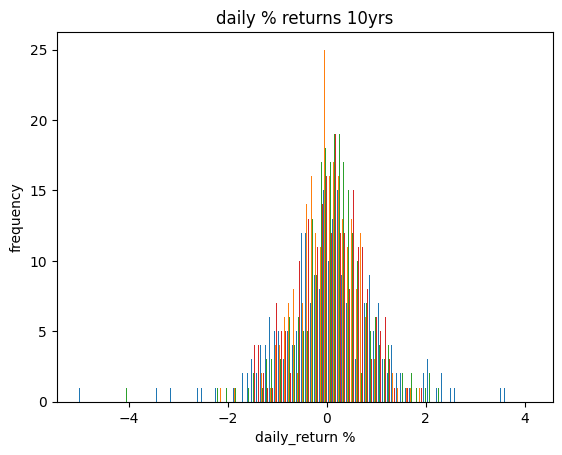

In [67]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(yf_returns_df,bins=100)
plt.xlabel('daily_return %')
plt.ylabel('frequency')
plt.title('daily % returns 10yrs')

In [69]:
yf_returns_df.mean()

Ticker
CNKY.L     0.023326
FTAL.L     0.047204
SXR8.DE    0.115695
S600.L     0.036375
dtype: float64